<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

In [1]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")

In [2]:
data = 'https://raw.githubusercontent.com/mkirby1995/NLP/master/State_of_Unions.json'
df = pd.read_json(data)
df = df.sort_values(by = ['year'])

df.head()

,president,year,content
125,Washington,1790,
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...


In [3]:
df['content'].describe()

count                                                   228
unique                                                  228
top       To the Congress of the United States:\n\nIn di...
freq                                                      1
Name: content, dtype: object

In [4]:
df.isna().sum()

president    0
year         0
content      0
dtype: int64

In [5]:
# first I will tokenize
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [12]:
#my tokenizer pipe w/stop word filter

def tokenize(series):
    tokens = []
    
    """ Tokenize while excluding stop words and punctuation """
    for doc in tokenizer.pipe(series, batch_size=1000):
        
        doc_tokens = []
        
        for token in doc:   
            
            #skip stops and punctuation
            if (token.is_stop == False) and (token.is_punct == False):
                continue
            else:
                doc_tokens.append(token)
                
        tokens.append(doc_tokens)

    return tokens

In [13]:
df['tokens'] = tokenize(df['content'])

In [14]:
df.head()

,president,year,content,tokens
125,Washington,1790,,[]
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...,"[of, the, and, of, may, we, with, the, on, our..."
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...,"[of, the, and, of, It, is, some, of, the, with..."
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...,"[of, the, and, of, Since, the, of, the, for, w..."
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...,"[of, the, and, of, When, we, call, to, the, of..."


In [ ]:
a

In [20]:
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
257,of,1,1,1.0,0.000001,0.000001,0.004386
466,the,1,1,2.0,0.000001,0.000002,0.004386
639,and,1,1,3.0,0.000001,0.000003,0.004386
1020,of,1,1,4.0,0.000001,0.000004,0.004386
456,may,1,1,5.0,0.000001,0.000005,0.004386
443,we,1,1,6.0,0.000001,0.000006,0.004386
1005,with,1,1,7.0,0.000001,0.000007,0.004386
996,the,1,1,8.0,0.000001,0.000008,0.004386
53,on,1,1,9.0,0.000001,0.000009,0.004386
240,our,1,1,10.0,0.000001,0.000010,0.004386


In [41]:
remove = [str(x) for x in wc['word'][:24].tolist()]

In [47]:
remove.append('\n')

['\n',
 '\n\n',
 'the',
 'i',
 'government',
 'united',
 'states',
 'it',
 'congress',
 'we',
 'great',
 'in',
 'public',
 'new',
 'people',
 'american',
 'year',
 'time',
 'this',
 'national',
 'country',
 'present',
 'war',
 'shall',
 '\\n',
 '\\n',
 '\n']

In [81]:
# I can see just from the top 5 that they are all stop words,
# so I'll clean further

STOP_WORDS = nlp.Defaults.stop_words.union(remove)
STOP_WORDS.update(['in', 'it', 'the', 'this', 'but', 'and'])

In [82]:
#my tokenizer pipe w/stop word filter

def tokenize_super_stop(series):
    tokens = []
    
    """ Tokenize while excluding stop words and punctuation """
    for doc in tokenizer.pipe(series, batch_size=1000):
        
        doc_tokens = []
        
        for token in doc:   
            
            #skip stops and punctuation
            if token.text not in STOP_WORDS:
                doc_tokens.append(token.text.lower())
                
        tokens.append(doc_tokens)

    return tokens

In [83]:
df['tokens'] = tokenize_super_stop(df['content'])

In [84]:
df.head()

,president,year,content,tokens,stems,lemmas
125,Washington,1790,,[],[],[]
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."


In [85]:
wc = count(df['tokens'])
wc.head()
# somehow 'the' cannot be removed, ok, let's visualize

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
254,the,227,11580,1.0,0.013745,0.013745,0.995614
137,i,227,9097,2.0,0.010798,0.024543,0.995614
542,united,225,4657,3.0,0.005528,0.030071,0.986842
302,states,223,4321,4.0,0.005129,0.035200,0.978070
20,government,207,4058,5.0,0.004817,0.040017,0.907895


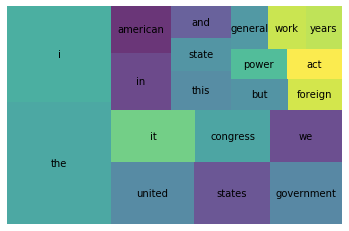

In [86]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [87]:
# stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def steminizer(series):
    
    stems = []
    
    for doc in tokenizer.pipe(series, batch_size=1000):
        
        doc_stems = []
        
        for token in doc:       
            #skip stops and punctuation
            if token.text not in STOP_WORDS:
                doc_stems.append(ps.stem(token.text.lower()))
        stems.append(doc_stems)
            
    return stems


In [88]:
STOP_WORDS

{'\n',
 '\n\n',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '\\n',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'american',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'congress',
 'could',
 'country',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'fo

In [89]:
df['stems'] = steminizer(df['content'])

In [90]:
df.head()

,president,year,content,tokens,stems,lemmas
125,Washington,1790,,[],[],[]
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...,"[fellow-citizens, senate, house, representativ...","[fellow-citizen, senat, hous, representatives:...","[Fellow, Citizens, Senate, House, Representati..."


In [91]:
wc = count(df['stems'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
230,the,227,11580,1.0,0.013745,0.013745,0.995614
128,i,227,9097,2.0,0.010798,0.024543,0.995614
304,state,227,6271,3.0,0.007444,0.031987,0.995614
360,unit,225,4823,4.0,0.005725,0.037711,0.986842
356,govern,214,4814,5.0,0.005714,0.043426,0.938596


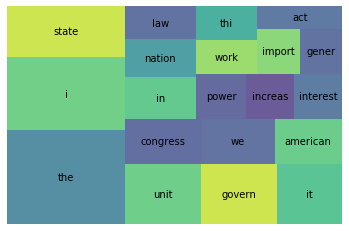

In [92]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [95]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.text not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas



In [96]:
df['lemmas'] = df['content'].apply(get_lemmas)

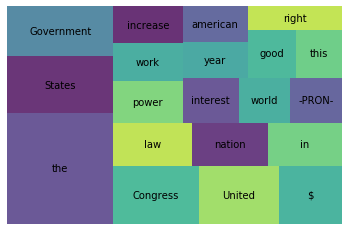

In [97]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [98]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
207,the,227,11626,1.0,0.014429,0.014429,0.995614
159,States,227,6015,2.0,0.007465,0.021895,0.995614
95,Government,211,5244,3.0,0.006508,0.028403,0.925439
592,Congress,227,4927,4.0,0.006115,0.034518,0.995614
150,United,225,4654,5.0,0.005776,0.040294,0.986842


## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)